In [ ]:
# Descargar el archivo de data índice
!wget https://raw.githubusercontent.com/jamezahidalgo/proyectoCienciaDatos/main/data/INDICE.xlsx
# Descargar el archivo de data académica
!wget https://raw.githubusercontent.com/jamezahidalgo/proyectoCienciaDatos/main/data/ACADEMICO.xlsx

--2024-12-04 04:28:17--  https://raw.githubusercontent.com/jamezahidalgo/proyectoCienciaDatos/main/data/INDICE.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400203 (391K) [application/octet-stream]
Saving to: ‘INDICE.xlsx.1’

INDICE.xlsx.1       100%[===================>] 390.82K  1.91MB/s    in 0.2s    

2024-12-04 04:28:17 (1.91 MB/s) - ‘INDICE.xlsx.1’ saved [400203/400203]

--2024-12-04 04:28:17--  https://raw.githubusercontent.com/jamezahidalgo/proyectoCienciaDatos/main/data/ACADEMICO.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

In [ ]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error

from sklearn.pipeline import Pipeline
from operator import itemgetter
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin

# Tratamiento data índice

In [ ]:
data_indice = pd.read_excel("INDICE.xlsx")
data_indice.shape

(3248, 28)

In [ ]:
data_indice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   AÑO               3248 non-null   int64         
 1   SEMESTRE          3248 non-null   int64         
 2   CODIGO_CARRERA    3248 non-null   int64         
 3   NOMBRE_CARRERA    3248 non-null   object        
 4   JORNADA           3248 non-null   object        
 5   RUT               3248 non-null   object        
 6   PERIODO_ABANDONO  63 non-null     object        
 7   TIPO_RENUNCIA     63 non-null     object        
 8   NOMBRES           3248 non-null   object        
 9   GENERO            3248 non-null   object        
 10  FECHA_NACIMIENTO  3248 non-null   datetime64[ns]
 11  ESTADO_CIVIL      3190 non-null   object        
 12  NACIONALIDAD      3248 non-null   object        
 13  TIPO_INGRESO      3248 non-null   object        
 14  SUBTIPO           2924 n

In [ ]:
data_indice.columns = pd.DataFrame(data_indice.columns)[0].apply(lambda x : x.lower()).values
data_indice.columns = pd.DataFrame(data_indice.columns)[0].apply(lambda x : x.replace(" ", "_")).values
data_indice.columns = pd.DataFrame(data_indice.columns)[0].apply(lambda x : x.replace(".", "")).values

In [ ]:
data_indice.columns

Index(['año', 'semestre', 'codigo_carrera', 'nombre_carrera', 'jornada', 'rut',
       'periodo_abandono', 'tipo_renuncia', 'nombres', 'genero',
       'fecha_nacimiento', 'estado_civil', 'nacionalidad', 'tipo_ingreso',
       'subtipo', 'año_ingreso', 'semestre_ingreso', 'fecha_matricula',
       'condicion', 'nombre_colegio', 'tipo_colegio', 'tipo_estudio',
       'prom_lem', 'egreso_em', 'año_psu', 'prom_psu', 'comuna', 'region'],
      dtype='object')

In [ ]:
data_indice = data_indice.drop(['año_psu', 'prom_psu', 'semestre_ingreso', 'tipo_ingreso',
                                'nombre_colegio', 'subtipo', 'estado_civil'], axis=1)
data_indice.shape

(3248, 21)

In [ ]:
data_indice['tipo_renuncia'].unique()

array([nan, 'Desertor', 'Suspensión pre-matricula', 'Suspension',
       'Renuncia'], dtype=object)

In [ ]:
data_indice.groupby('tipo_renuncia').size()

,0
tipo_renuncia,
Desertor,36
Renuncia,2
Suspension,22
Suspensión pre-matricula,3


In [ ]:
# Reemplaza los nulos por NO desertor
data_indice['tipo_renuncia'] = data_indice['tipo_renuncia'].fillna("No desertor")

In [ ]:
data_indice.groupby('tipo_renuncia').size()

,0
tipo_renuncia,
Desertor,36
No desertor,3185
Renuncia,2
Suspension,22
Suspensión pre-matricula,3


In [ ]:
data_indice['periodo_abandono'] = data_indice['periodo_abandono'].fillna("No aplica")

In [ ]:
data_indice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   año               3248 non-null   int64         
 1   semestre          3248 non-null   int64         
 2   codigo_carrera    3248 non-null   int64         
 3   nombre_carrera    3248 non-null   object        
 4   jornada           3248 non-null   object        
 5   rut               3248 non-null   object        
 6   periodo_abandono  3248 non-null   object        
 7   tipo_renuncia     3248 non-null   object        
 8   nombres           3248 non-null   object        
 9   genero            3248 non-null   object        
 10  fecha_nacimiento  3248 non-null   datetime64[ns]
 11  nacionalidad      3248 non-null   object        
 12  año_ingreso       3248 non-null   int64         
 13  fecha_matricula   3248 non-null   datetime64[ns]
 14  condicion         3248 n

In [ ]:
data_indice.dropna(inplace=True)
data_indice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3129 entries, 0 to 3212
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   año               3129 non-null   int64         
 1   semestre          3129 non-null   int64         
 2   codigo_carrera    3129 non-null   int64         
 3   nombre_carrera    3129 non-null   object        
 4   jornada           3129 non-null   object        
 5   rut               3129 non-null   object        
 6   periodo_abandono  3129 non-null   object        
 7   tipo_renuncia     3129 non-null   object        
 8   nombres           3129 non-null   object        
 9   genero            3129 non-null   object        
 10  fecha_nacimiento  3129 non-null   datetime64[ns]
 11  nacionalidad      3129 non-null   object        
 12  año_ingreso       3129 non-null   int64         
 13  fecha_matricula   3129 non-null   datetime64[ns]
 14  condicion         3129 non-nu

In [ ]:
periodos_trabajo = ['2021-1', '2021-2', '2022-1', '2022-2',
       '2023-1', '2023-2']
desertores = data_indice.query("(tipo_renuncia == 'Desertor' or tipo_renuncia == 'Renuncia') and periodo_abandono in @periodos_trabajo")
desertores.shape

(38, 21)

In [ ]:
desertores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 8 to 2604
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   año               38 non-null     int64         
 1   semestre          38 non-null     int64         
 2   codigo_carrera    38 non-null     int64         
 3   nombre_carrera    38 non-null     object        
 4   jornada           38 non-null     object        
 5   rut               38 non-null     object        
 6   periodo_abandono  38 non-null     object        
 7   tipo_renuncia     38 non-null     object        
 8   nombres           38 non-null     object        
 9   genero            38 non-null     object        
 10  fecha_nacimiento  38 non-null     datetime64[ns]
 11  nacionalidad      38 non-null     object        
 12  año_ingreso       38 non-null     int64         
 13  fecha_matricula   38 non-null     datetime64[ns]
 14  condicion         38 non-null  

In [ ]:
data_indice['edad_ingreso'] = data_indice['año_ingreso'] - data_indice['fecha_nacimiento'].dt.year

In [ ]:
data_indice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3129 entries, 0 to 3212
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   año               3129 non-null   int64         
 1   semestre          3129 non-null   int64         
 2   codigo_carrera    3129 non-null   int64         
 3   nombre_carrera    3129 non-null   object        
 4   jornada           3129 non-null   object        
 5   rut               3129 non-null   object        
 6   periodo_abandono  3129 non-null   object        
 7   tipo_renuncia     3129 non-null   object        
 8   nombres           3129 non-null   object        
 9   genero            3129 non-null   object        
 10  fecha_nacimiento  3129 non-null   datetime64[ns]
 11  nacionalidad      3129 non-null   object        
 12  año_ingreso       3129 non-null   int64         
 13  fecha_matricula   3129 non-null   datetime64[ns]
 14  condicion         3129 non-nu

In [ ]:
# Adapta el tipo de dato del RUT
data_indice['rut'] = data_indice['rut'].astype("str")

# Tratamiento data académica

In [ ]:
data_academica = pd.read_excel("ACADEMICO.xlsx")
data_academica.shape

(16507, 35)

In [ ]:
data_academica.columns = pd.DataFrame(data_academica.columns)[0].apply(lambda x : x.lower()).values
data_academica.columns = pd.DataFrame(data_academica.columns)[0].apply(lambda x : x.replace(" ", "_")).values
data_academica.columns = pd.DataFrame(data_academica.columns)[0].apply(lambda x : x.replace(".", "")).values

In [ ]:
data_academica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16507 entries, 0 to 16506
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ano_academico             16507 non-null  int64  
 1   dom_semestre              16507 non-null  int64  
 2   carrera_codigo_original   16507 non-null  int64  
 3   carrera_codigo            16507 non-null  int64  
 4   carrera_nombre            16507 non-null  object 
 5   jornada                   16507 non-null  object 
 6   codigo_ramo               16507 non-null  object 
 7   descripcion_ramo          16507 non-null  object 
 8   deh_seccion               16507 non-null  int64  
 9   rut_alumno                16507 non-null  object 
 10  nombre_alumno             16507 non-null  object 
 11  estado_final_ramo         16507 non-null  object 
 12  cantidad_notas_parciales  16507 non-null  int64  
 13  cantidad_notas_examen     16507 non-null  int64  
 14  c1    

In [ ]:
data_academica['rut_alumno'] = data_academica['rut_alumno'].astype("str")

In [ ]:
data_academica_modelo = data_academica.drop(['carrera_nombre', 'jornada', 'codigo_ramo',
       'descripcion_ramo', 'deh_seccion',
       'cantidad_notas_parciales',
       'cantidad_notas_examen',
       'c4', 'c5', 'c6','c7','c8','c9','c10','e1',
       'e2',
       'sede_codigo_alumno', 'carrera_codigo_alum', 'prom_calificaciones',
       'prom_examenes',  'ramo_codigo_malla',
       'descripcion_ramo_malla', 'examen_repeticion'], axis=1)
data_academica_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16507 entries, 0 to 16506
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ano_academico            16507 non-null  int64  
 1   dom_semestre             16507 non-null  int64  
 2   carrera_codigo_original  16507 non-null  int64  
 3   carrera_codigo           16507 non-null  int64  
 4   rut_alumno               16507 non-null  object 
 5   nombre_alumno            16507 non-null  object 
 6   estado_final_ramo        16507 non-null  object 
 7   c1                       16504 non-null  float64
 8   c2                       16504 non-null  float64
 9   c3                       16441 non-null  float64
 10  codigo_jornada_alumno    16507 non-null  int64  
 11  nota_final               16507 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.5+ MB


In [ ]:
# Contar valores nulos por columna
nulos_por_columna = data_academica_modelo.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0].index.tolist()
print("Columnas con nulos:", columnas_con_nulos)

Columnas con nulos: ['c1', 'c2', 'c3']


In [ ]:
nulos_por_columna

,0
ano_academico,0
dom_semestre,0
carrera_codigo_original,0
carrera_codigo,0
rut_alumno,0
nombre_alumno,0
estado_final_ramo,0
c1,3
c2,3
c3,66


In [ ]:
data_academica_modelo = data_academica_modelo.dropna()
data_academica.shape

(16507, 35)

In [ ]:
# Convertir ambas colecciones a conjuntos
set_indice = set(data_indice.rut.unique())
set_academico = set(data_academica.rut_alumno.unique())

# Obtener los elementos que están en set_desertores pero no en set_indice
diferencia = set_indice - set_academico

# Mostrar los resultados
print("Elementos en índice pero no en data académica:")
print(len(diferencia))

Elementos en índice pero no en data académica:
21


In [ ]:
diferencia

{'145939208',
 '159520749',
 '183561324',
 '18807524K',
 '188143342',
 '190913643',
 '192248353',
 '19512616K',
 '195777209',
 '196769773',
 '197676566',
 '199061291',
 '20257825K',
 '203616988',
 '204387079',
 '20488109K',
 '209078457',
 '210712127',
 '210729984',
 '212883506',
 '21494846K'}

In [ ]:
data_indice.query("rut == '21494846K'")

,año,semestre,codigo_carrera,nombre_carrera,jornada,rut,periodo_abandono,tipo_renuncia,nombres,genero,...,año_ingreso,fecha_matricula,condicion,tipo_colegio,tipo_estudio,prom_lem,egreso_em,comuna,region,edad_ingreso
2302,2023,1,1446214,Ingenieria en Conectividad y Redes,D,21494846K,2023-1,Desertor,David Moises Briceno Tapia,Masculino,...,2023,2023-01-20,Inscrito,Particular Subvencionado,Cientifico Humanista,6.1,2021,San Pedro de la Paz,VIII - BIO-BIO,19


In [ ]:
# Convertir ambas colecciones a conjuntos
set_desertores = set(desertores.rut.unique())
set_academico = set(data_academica.rut_alumno.unique())

# Obtener los elementos que están en set_desertores pero no en set_indice
diferencia = set_desertores - set_academico

# Mostrar los resultados
print("Elementos en desertores pero no en data académica:")
print(len(diferencia))

Elementos en desertores pero no en data académica:
4


In [ ]:
data_academica_modelo.rename(columns={'rut_alumno' : 'rut'}, inplace=True)

In [ ]:
# Unir los DataFrames usando rut como clave
data_modelo = pd.merge(data_indice, data_academica_modelo, on='rut', how='inner')
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66973 entries, 0 to 66972
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   año                      66973 non-null  int64         
 1   semestre                 66973 non-null  int64         
 2   codigo_carrera           66973 non-null  int64         
 3   nombre_carrera           66973 non-null  object        
 4   jornada                  66973 non-null  object        
 5   rut                      66973 non-null  object        
 6   periodo_abandono         66973 non-null  object        
 7   tipo_renuncia            66973 non-null  object        
 8   nombres                  66973 non-null  object        
 9   genero                   66973 non-null  object        
 10  fecha_nacimiento         66973 non-null  datetime64[ns]
 11  nacionalidad             66973 non-null  object        
 12  año_ingreso              66973 n

In [ ]:
data_modelo.sample()

,año,semestre,codigo_carrera,nombre_carrera,jornada,rut,periodo_abandono,tipo_renuncia,nombres,genero,...,dom_semestre,carrera_codigo_original,carrera_codigo,nombre_alumno,estado_final_ramo,c1,c2,c3,codigo_jornada_alumno,nota_final
4922,2021,2,1446102,Ingenieria en Informatica,D,173482396,No aplica,No desertor,Daniel Alfonso Toledo Arratia,Masculino,...,1,462,462,Toledo Arratia Daniel Alfonso,AR,5.0,5.7,5.6,0,5.5


In [ ]:
data_modelo['desertor'] = data_modelo['tipo_renuncia'].apply(lambda x: 1 if x in ['Desertor', 'Renuncia'] else 0)


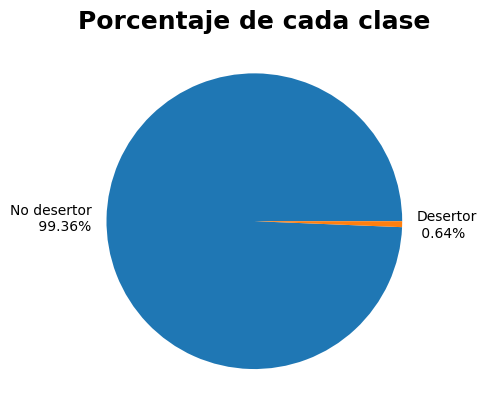

In [ ]:
# Gráfico de torta del porcentaje de cada clase
clases = np.array([data_modelo[data_modelo.desertor == 0.0].shape[0],
                   data_modelo[data_modelo.desertor == 1.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'No desertor\n ' + labels[0]
labels[1] = 'Desertor\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()

In [ ]:
data_modelo.columns

Index(['año', 'semestre', 'codigo_carrera', 'nombre_carrera', 'jornada', 'rut',
       'periodo_abandono', 'tipo_renuncia', 'nombres', 'genero',
       'fecha_nacimiento', 'nacionalidad', 'año_ingreso', 'fecha_matricula',
       'condicion', 'tipo_colegio', 'tipo_estudio', 'prom_lem', 'egreso_em',
       'comuna', 'region', 'edad_ingreso', 'ano_academico', 'dom_semestre',
       'carrera_codigo_original', 'carrera_codigo', 'nombre_alumno',
       'estado_final_ramo', 'c1', 'c2', 'c3', 'codigo_jornada_alumno',
       'nota_final', 'desertor'],
      dtype='object')

In [ ]:
data_modelo = data_modelo.drop(['comuna', 'condicion', 'nacionalidad',
                                'codigo_carrera','nombre_carrera', 'jornada', 'periodo_abandono',
                                'nombres', 'genero', 'fecha_matricula', 'carrera_codigo_original',
                                'carrera_codigo', 'nombre_alumno', 'estado_final_ramo',
                                'codigo_jornada_alumno','nota_final',
                                'tipo_renuncia', 'año', 'semestre', 'ano_academico', 'dom_semestre',
                                'rut','tipo_estudio', 'estado_final_ramo', 'fecha_nacimiento'], axis=1)

In [ ]:
data_modelo.columns

Index(['año_ingreso', 'tipo_colegio', 'prom_lem', 'egreso_em', 'region',
       'edad_ingreso', 'c1', 'c2', 'c3', 'desertor'],
      dtype='object')

In [ ]:
encoder = LabelEncoder()
for feature in ['region', 'tipo_colegio']:
  data_modelo[feature] = encoder.fit_transform(data_modelo[feature])
data_modelo.sample()

,año_ingreso,tipo_colegio,prom_lem,egreso_em,region,edad_ingreso,c1,c2,c3,desertor
22339,2021,0,5.6,2019,6,19,3.9,5.3,5.5,0


# Modelamiento

In [ ]:
target_names = ['No deserta', 'Deserta']

In [ ]:
# Determina los datos con los cuales se trabajará
features = data_modelo.drop(columns = ['desertor']).columns
X = data_modelo[features]
y = data_modelo.desertor

In [ ]:
# Modelos base
models = {
    'Logistic Regression': LogisticRegression(max_iter=4000, class_weight="balanced"),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=29, class_weight="balanced"),
    'Random Forest': RandomForestClassifier(random_state=29, class_weight="balanced")
}

# Hiperparámetros a probar
param_grid = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree Classifier': {
        'max_depth': [3, 5, 10, None],
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'criterion': ['gini', 'entropy']
    }
}

In [ ]:
def obtiene_mejores_parametros(X_train, y_train, models, metrica : str = "balanced_accuracy"):
  """

  Args:
    X_train: data de entrenamiento
    y_train: etiquetas
    models: modelos a probar
    metrica: nombre de la mética a usar

  Returns: dos diccionarios: mejores parámetros y mejores scores

  """
  # Resultados
  best_params = {}
  best_scores = {}

  # Iterar sobre los modelos y sus hiperparámetros
  for model_name, model in models.items():
    print(f"Optimizando {model_name} usando {metrica}...")
    grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring=metrica, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_params[model_name] = grid.best_params_
    best_scores[model_name] = grid.best_score_
    print(f"Mejores parametros para {model_name}: {grid.best_params_}")
    print(f"Mejor cross-validated {metrica} para {model_name}: {grid.best_score_:.4f}\n")

  # Mostrar los mejores resultados
  print("Resumen de mejores modelos:")
  for model_name in best_params:
    print(f"{model_name}:")
    print(f"  Mejores Parámetros: {best_params[model_name]}")
    print(f"  Mejor CV {metrica}: {best_scores[model_name]:.4f}")

  return best_params, best_scores

def ver_matriz(matriz_x: np.array, target_names: np.array,
                     ax, title="Matriz de confusión") -> None:
    """Visualiza una matriz de confusión en un subplot en el ax indicado """
    clases = target_names
    group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten() / matriz_x.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(target_names), len(target_names))

    sns.heatmap(matriz_x, annot=labels, fmt='', cmap='Blues',
                xticklabels=clases, yticklabels=clases, ax=ax)

    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel("PREDICCIÓN", fontsize=10)
    ax.set_ylabel("REAL", fontsize=10)

def metrics_by_matrix(matriz : np.ndarray):
    """ Retorna las métricas de clasificación desde la matriz de confusión """
    tn, fp, fn, tp = matriz.ravel()
    accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
    precision_manual = tp/(tp+fp)
    recall_manual = tp/(tp+fn)
    f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
    return accuracy_manual, precision_manual, recall_manual, f1_score_manual

def get_auc(real, prediccion):
    """ Retorna AUC, TPR y FPR """
    fpr, tpr, thresholds = roc_curve(real, prediccion)
    return auc(fpr, tpr), tpr, fpr, thresholds

def false_positive_rate(cm):
    """Recibe una matriz de confusión y retorna la métrica de False Positive Rate"""
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)

def interpretaciones(recall_value : float, precision_value : float, accuracy_value : float, positive_text : str):
  """
  Se ofrecen interpretaciones menos genéricas y más orientadas al negocio de las métricas, se omite f1-score porque es una combinación de precision y recall
  """
  recall_interpretacion = f"Se han identificado el {recall_value*100:.2f}% de estudiantes {positive_text}"
  precision_interpretacion = f"Se han identificado un {precision_value*100:.2f}% de estudiantes {positive_text} y que realmente lo son"
  accuracy_interpretacion = f"El modelo acierta con un {accuracy_value*100:.2f}% de efectividad la deserción"
  return recall_interpretacion, precision_interpretacion, accuracy_interpretacion

In [ ]:
# Separación en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29,
                                                    shuffle=True, stratify = y)

In [ ]:
best_params_accuracy, best_scores_accuracy = obtiene_mejores_parametros(X_train, y_train, models)
print(best_params_accuracy)
print(best_scores_accuracy)

Optimizando Logistic Regression usando balanced_accuracy...


KeyboardInterrupt: 

In [ ]:
best_params_precision, best_scores_precision = obtiene_mejores_parametros(X_train, y_train, models, "precision")
print(best_params_precision)
print(best_scores_precision)

Optimizando Logistic Regression usando precision...


In [ ]:
best_params_recall, best_scores_recall = obtiene_mejores_parametros(X_train, y_train, models, "recall")
print(best_params_recall)
print(best_scores_recall)

In [ ]:
best_params_f1, best_scores_f1 = obtiene_mejores_parametros(X_train, y_train, models, "f1")
print(best_params_f1)
print(best_scores_f1)

In [ ]:
best = {"accuracy" : best_scores_accuracy,
        "precision": best_scores_precision,
        "recall": best_scores_recall,
        "f1score": best_scores_f1}
best_parameters = {"accuracy" : best_params_accuracy,
        "precision": best_params_precision,
        "recall": best_params_recall,
        "f1score": best_params_f1
}
resultados = []
for metrica in ['accuracy', 'precision', 'recall', 'f1score']:
  filtered_items = [(key, value) for key, value in best[metrica].items() if value != 1]
  name_best_model, best_score = max(filtered_items, key=itemgetter(1))
  best_parameters_model = best_parameters[metrica][name_best_model]
  # Agrega el resultado
  resultados.append({"métrica" : metrica,
                     "nombre_modelo" : name_best_model,
                     "parámetros": best_parameters_model,
                     "score" : best_score})


In [ ]:
pd.DataFrame(resultados)

In [ ]:
mejor_modelo_f1 = pd.DataFrame(resultados).query("métrica == 'f1score'")

In [ ]:
print(mejor_modelo_f1.score)
print(mejor_modelo_f1.parámetros)
print(mejor_modelo_f1.nombre_modelo)

In [ ]:
for parametro, valor in mejor_modelo_f1.parámetros.items():
  print(parametro, valor)

In [ ]:
model_clf_f1 = DecisionTreeClassifier(random_state=29, class_weight="balanced",
                                   criterion = 'entropy', max_depth = None, splitter = 'best')
model_clf_f1.fit(X_train, y_train)

In [ ]:
y_pred_f1 = model_clf_f1.predict(X_test)

In [ ]:
matriz = confusion_matrix(y_test, y_pred_f1)

fig, axes = plt.subplots(1, 1, figsize=(5, 4), facecolor='silver')
ver_matriz(matriz, target_names, axes)

In [ ]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[-math.inf, 0.49], [0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, np.inf]]
rangos = pd.DataFrame(np.array(valores).reshape(5,-1),
            index = ['Muy Malo', 'Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

In [ ]:
# Función para encontrar el rango de un valor dado
def encontrar_rango(valor : float, rangos : pd.DataFrame) -> str:
    for rango, (inf, sup) in rangos.iterrows():
        if inf <= round(valor,2) <= sup:
            return rango
    return 'Fuera de rango'

In [ ]:
auc_r, tpr_r, fpr_r, thresholds_r = get_auc(y_test, y_pred_f1)
print("Rango ROC_AUC", encontrar_rango(valor=auc_r, rangos=rangos))
print(Counter(y_pred_f1))

In [ ]:
y_prob_f1 = model_clf_f1.predict_proba (X_test) [ : , 1]
ejex, ejey, _ = roc_curve (y_test, y_prob_f1)
roc_auc = auc (ejex, ejey)

plt.figure ()
plt.plot (ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.4f' % roc_auc)

plt.plot ([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot ([0, 0, 1], [0, 1, 1], lw = 2, linestyle = ':', color = 'black',
          label = 'Clasificador perfecto')

plt.xlim ([-0.05, 1.05])
plt.ylim ([-0.05, 1.05])

plt.xlabel ('FPR (1 - ESPECIFICIDAD)', fontsize=14, fontweight="bold")
plt.ylabel ('SENSIBILIDAD', fontsize=14, fontweight="bold")
plt.legend (loc = 'lower right')
plt.title("Curva ROC", fontsize=16, fontweight="bold")
plt.show ()

In [ ]:
print(classification_report(y_test, y_pred_f1))

In [ ]:
# Crear un DataFrame para facilitar el análisis
features_df = pd.DataFrame({
    'Caracteristica': X_train.columns,  # Nombres de las columnas
    'Importancia': model_clf_f1.feature_importances_
})

# Ordenar las características por importancia (descendente)
features_df = features_df.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 características más importantes
print(features_df.head(10))

# Visualización de las importancias
plt.figure(figsize=(10, 6))
plt.barh(features_df['Caracteristica'], features_df['Importancia'], color='skyblue')
plt.xlabel('Importancia', fontsize=14, fontweight="bold")
plt.ylabel('Característica', fontsize=14, fontweight="bold")
plt.title('Importancia de las características en mejor modelo',
          fontsize=16, fontweight="bold")
plt.gca().invert_yaxis()  # Invertir eje para mostrar la más importante arriba
plt.show()

In [ ]:
data_para_excel = open("data_excel_f1.txt", "w")
data_para_excel.write("id;score clasificación;clase real\n")
for indice in range(len(model_clf_f1.predict_proba(X_test))):
  data_para_excel.write(str(indice+1) + ";" +
                        str(model_clf_f1.predict_proba(X_test)[indice][1]) + ";" +
                        ("SI" if np.array(y_test)[indice] else "NO") + "\n")
data_para_excel.close()